In [ ]:
import numpy as np # Imports Python numerical library
import seaborn as sns # Imports Library for drawing heatmaps
import matplotlib.pyplot as plt # Import Library for plotting graphs
from scipy.optimize import linprog # Imports Linear Programming function
from scipy.optimize import linprog_verbose_callback # Imports Linear Programming function
from IPython.display import IFrame # Imports HTML element loader
import time

In [ ]:
!pip install cobra

In [ ]:
import cobra
from time import sleep

In [ ]:
model = cobra.io.load_json_model('./iAA1300_C.json')
original_model = model.copy()

### Explore the model

In [ ]:
reacs = [r.id for r in model.reactions]
print(reacs)

['ALATA_D2', 'SHCHD2', 'CPPPGO', 'GTHOr', 'GLYCTO2', 'GLYCTO3', 'GLYCTO4', 'TRPS2', 'G3PD5', 'EX_chol_e', 'LEUTAi', 'SHK3Dr', 'G5SD', 'ALATA_L2', 'APRAUR', 'DB4PS', 'RBFK', 'ACP1_FMN', 'RBFSb', 'EX_pi_e', 'EX_h_e', 'DMATT', 'GRTT', 'UPP3S', 'UPPDC1', 'EX_ade_e', 'EX_4abut_e', 'EX_ac_e', 'EX_akg_e', 'EX_ala__L_e', 'EX_asp__L_e', 'EX_cytd_e', 'EX_fum_e', 'EX_gua_e', 'HCO3E', 'IMPC', 'IMPD', 'ECOAH4', 'GLUTRS', 'TMPPP', 'NDPK5', 'DHORTS', 'OMPDC', 'CS', 'ICDHyr', 'ACALD', 'ACS', 'PPA', 'PPCK', 'ALAR', 'ALATA_L', 'XYLK', 'GLYK', 'ASPTA', 'FBP', 'PYK', 'A5PISO', 'EX_metsox_S__L_e', 'IPPMIb', 'ACHBS', 'ACLS', 'PSCVT', 'ANS', 'ANPRT', 'CHORM', 'CHORS', 'IGPS', 'EX_fe3_e', 'EX_glcn_e', 'EX_gln__L_e', 'EX_glyc_e', 'EX_man_e', 'EX_mn2_e', 'EX_rib__D_e', 'EX_sbt__D_e', 'ECOAH6', 'ENO', 'PPS', 'PGI', 'PGK', 'EDA', 'RPE', 'TALA', 'TKT1', 'ALCD2x', 'ALDD2y', 'EX_ura_e', 'EX_xan_e', 'FMNAT', 'NADDP', 'NMNAT', 'HMPK1', 'NDPK6', 'NDPK8', 'PTRCTA', 'CYSDS', 'EX_co2_e', 'PMDPHT', 'ILETA', 'VALTA', 'ORPT'

In [ ]:
model

Name,iAA1300
Memory address,7caef0244e50
Number of metabolites,1960
Number of reactions,2289
Number of genes,1300
Number of groups,0
Objective expression,1.0*BIOMASS_Av_DJ_core - 1.0*BIOMASS_Av_DJ_core_reverse_428bc
Compartments,"c, e, p"


In [ ]:
model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
ca2_e,EX_ca2_e,0.004915,0,0.00%
cl_e,EX_cl_e,0.004915,0,0.00%
cobalt2_e,EX_cobalt2_e,2.36E-05,0,0.00%
cu2_e,EX_cu2_e,0.0006694,0,0.00%
fe2_e,EX_fe2_e,0.007792,0,0.00%
fe3_e,EX_fe3_e,0.007372,0,0.00%
glc__D_e,EX_glc__D_e,15,6,100.00%
h_e,EX_h_e,1.178,0,0.00%
k_e,EX_k_e,0.1843,0,0.00%
mg2_e,EX_mg2_e,0.008191,0,0.00%


In [ ]:
model.medium

{'EX_pi_e': 1000.0,
 'EX_h_e': 1000.0,
 'EX_fe3_e': 0.05,
 'EX_mn2_e': 1000.0,
 'EX_fe2_e': 0.05,
 'EX_glc__D_e': 15.0,
 'EX_zn2_e': 1000.0,
 'EX_mg2_e': 1000.0,
 'EX_ca2_e': 1000.0,
 'EX_ni2_e': 1000.0,
 'EX_cu2_e': 1000.0,
 'EX_cobalt2_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_mobd_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_cl_e': 1000.0,
 'EX_n2_e': 1000.0}

In [ ]:
model.compartments

{'c': '', 'e': '', 'p': ''}

In [ ]:
startTime = time.time()
solution = model.optimize()
executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))
print('Maximum objective = ',solution.objective_value)
print('Status = ',solution.status)


Execution time in seconds: 0.4811890125274658
Maximum objective =  0.9308245166661814
Status =  optimal


In [ ]:
model.reactions.BIOMASS_Av_DJ_core

Reaction identifier,BIOMASS_Av_DJ_core
Name,A. vinelandii DJ biomass objective function - core
Memory address,0x7caeedcfc090
Stoichiometry,0.000223 10fthf_c + 2.6e-05 2fe2s_c + 0.000223 2ohph_c + 0.00026 4fe4s_c + 0.583020414344392 ala__L_c + 0.000223 amet_c + 0.4009934072884 arg__L_c + 0.126569944053473 asn__L_c + 0.267095137584612... 0.000223 10-Formyltetrahydrofolate + 2.6e-05 [2Fe-2S] iron-sulfur cluster + 0.000223 2-Octaprenyl-6-hydroxyphenol + 0.00026 [4Fe-4S] iron-sulfur cluster + 0.583020414344392 L-Alanine + 0.000223...
GPR,
Lower bound,0.0
Upper bound,1000.0


In [ ]:
def plot_fba(fluxes, reactions = reacs):
  n = len(reactions)
  v_pos = np.arange(n)
  plt.bar(v_pos, fluxes, align='center')
  plt.xticks(v_pos, reactions)
  plt.ylabel('Flux Value')
  plt.title('Solution Vector')
  plt.show()

In [ ]:
solution = model.optimize()

In [ ]:
solution.fluxes[(10 < solution.fluxes) & (solution.fluxes < 40)]

,fluxes
CS,16.057125
PYK,11.217454
ENO,11.984462
EDA,13.192174
EDD,13.192174
FUM,16.025183
GAPD,13.536933
HEX1,15.000000
MDH2,18.517689
G6PDH2r,16.088017


In [ ]:
model.reactions.HEX1

Reaction identifier,HEX1
Name,Hexokinase (D-glucose:ATP)
Memory address,0x7caeee29ae10
Stoichiometry,atp_c + glc__D_c --> adp_c + g6p_c + h_c ATP C10H12N5O13P3 + D-Glucose --> ADP C10H12N5O10P2 + D-Glucose 6-phosphate + H+
GPR,Avin_04130
Lower bound,0.0
Upper bound,1000.0


In [ ]:
solution.fluxes.sort_values(ascending=False)

,fluxes
ATPS4rpp,158.307041
QCCOR,86.230338
CYOO2pp,86.230338
EX_h2o_e,62.124626
EX_co2_e,52.314144
...,...
EX_o2_e,-43.115590
CO2tex,-52.314144
CO2tpp,-52.314144
H2Otpp,-62.124626


In [ ]:
model.reactions.ATPS4rpp

Reaction identifier,ATPS4rpp
Name,ATP synthase (four protons for one ATP) (periplasm)
Memory address,0x7caeedff8ed0
Stoichiometry,adp_c + 4.0 h_p + pi_c <=> atp_c + h2o_c + 3.0 h_c ADP C10H12N5O10P2 + 4.0 H+ + Phosphate <=> ATP C10H12N5O13P3 + H2O H2O + 3.0 H+
GPR,(Avin_51800 and Avin_51890 and Avin_51920 and Avin_52150 and Avin_52160) or Avin_24200 or...
Lower bound,-1000.0
Upper bound,1000.0


In [ ]:
model.reactions.QCCOR

Reaction identifier,QCCOR
Name,quinone: cytochrome c oxidoreductase
Memory address,0x7caeedb5c990
Stoichiometry,2.0 ficytC_c + 2.0 h_c + q8h2_c <=> 2.0 focytC_c + 4.0 h_p + q8_c 2.0 Ferricytochrome c + 2.0 H+ + Ubiquinol-8 <=> 2.0 Ferrocytochrome C + 4.0 H+ + Ubiquinone-8
GPR,Avin_13060 and Avin_13070 and Avin_13080
Lower bound,-1000.0
Upper bound,1000.0


In [ ]:
model.reactions.CYOO2pp

Reaction identifier,CYOO2pp
Name,Cytochrome-c oxidase (2 protons translocated) periplasm
Memory address,0x7caeed4704d0
Stoichiometry,2.0 focytC_c + 4.0 h_c + 0.5 o2_c --> 2.0 ficytC_c + h2o_c + 2.0 h_p 2.0 Ferrocytochrome C + 4.0 H+ + 0.5 O2 O2 --> 2.0 Ferricytochrome c + H2O H2O + 2.0 H+
GPR,(Avin_11180 and Avin_11170) or (Avin_00990 and Avin_01010 and Avin_01020)
Lower bound,0.0
Upper bound,1000.0


In [ ]:
model.reactions.CO2tex

Reaction identifier,CO2tex
Name,CO2 transport via diffusion (extracellular to periplasm)
Memory address,0x7caeee15c9d0
Stoichiometry,co2_e <=> co2_p CO2 CO2 <=> CO2 CO2
GPR,Avin_09190 or Avin_16650 or Avin_22010 or Avin_26940 or Avin_27200 or Avin_33610 or Avin_41140 or...
Lower bound,-1000.0
Upper bound,1000.0


In [ ]:
model.reactions.CO2tpp

Reaction identifier,CO2tpp
Name,CO2 transporter via diffusion (periplasm)
Memory address,0x7caeedfc5f50
Stoichiometry,co2_p <=> co2_c CO2 CO2 <=> CO2 CO2
GPR,
Lower bound,-1000.0
Upper bound,1000.0


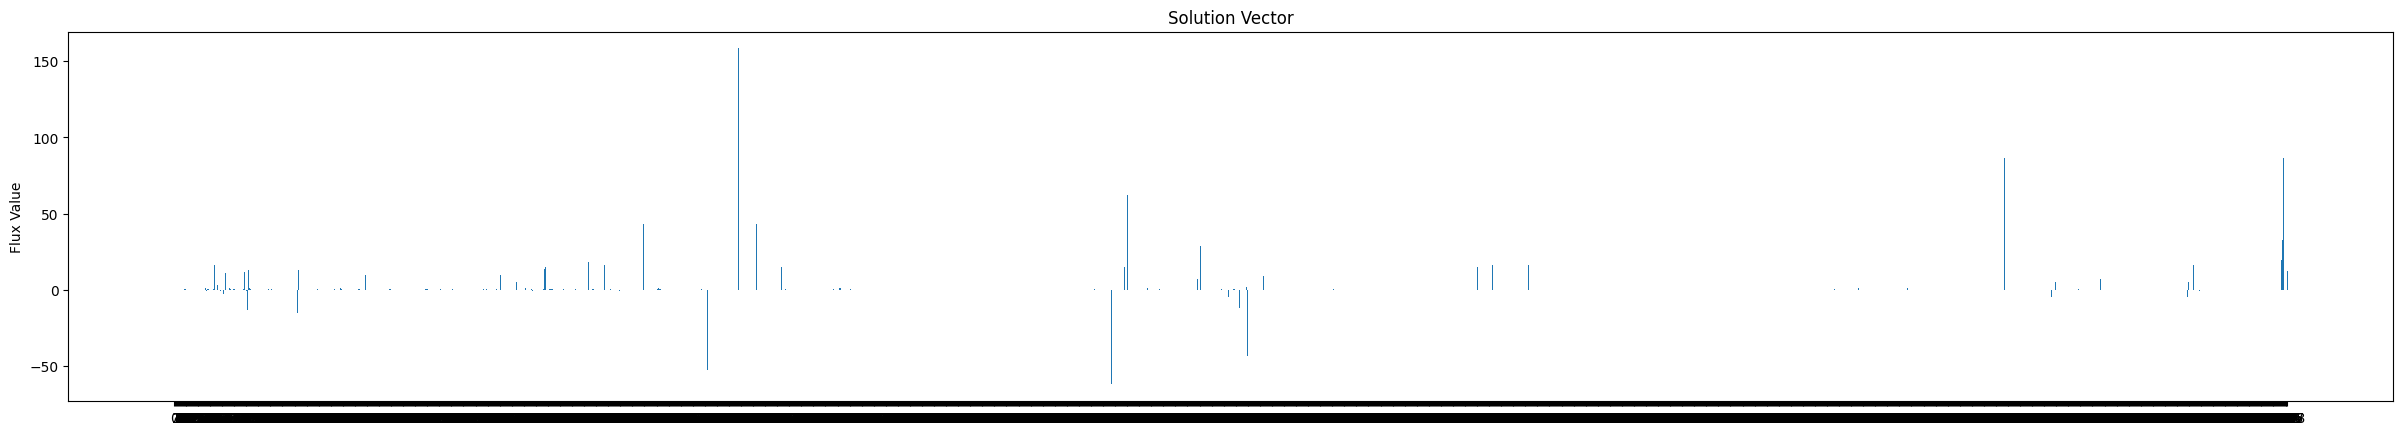

In [ ]:
v_pos = np.arange(len(solution.fluxes))
f = plt.figure()
f.set_figwidth(30)
plt.bar(v_pos, solution.fluxes, align='center')
plt.xticks(v_pos)
#f.set_figheight(8)
plt.ylabel('Flux Value')
plt.title('Solution Vector')
plt.show()

### Growth on different substrates

In [ ]:
original_model.medium

{'EX_pi_e': 1000.0,
 'EX_h_e': 1000.0,
 'EX_fe3_e': 0.05,
 'EX_mn2_e': 1000.0,
 'EX_fe2_e': 0.05,
 'EX_glc__D_e': 15.0,
 'EX_zn2_e': 1000.0,
 'EX_mg2_e': 1000.0,
 'EX_ca2_e': 1000.0,
 'EX_ni2_e': 1000.0,
 'EX_cu2_e': 1000.0,
 'EX_cobalt2_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_mobd_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_cl_e': 1000.0,
 'EX_n2_e': 1000.0}

In [ ]:
# Default growth (glucose)
model = original_model.copy()
model.optimize().objective_value

0.9308245166661775

In [ ]:
# No glucose >:(
model = original_model.copy()
model.reactions.EX_glc__D_e.bounds = [0, 0]
model.optimize().objective_value

/usr/local/lib/python3.11/dist-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


0.0

In [ ]:
# Fructose!
model = original_model.copy()
model.reactions.EX_glc__D_e.bounds = [0, 0]
model.reactions.EX_fru_e.bounds = [-15, -15]
model.optimize().objective_value

0.9661466052333049

In [ ]:
# Sucrose!
model = original_model.copy()
model.reactions.EX_glc__D_e.bounds = [0, 0]
model.reactions.EX_sucr_e.bounds = [-15, -15]
model.optimize().objective_value

1.8944082892298726

In [ ]:
model = original_model.copy()
model.reactions.EX_glc__D_e.bounds = [0, 0]
model.reactions.EX_sucr_e.bounds = [-15, -15]
solution = model.optimize()
solution.fluxes.index

,fluxes
H2Otpp,-109.071448
H2Otex,-109.071448
CO2tpp,-104.387907
CO2tex,-104.387907
EX_o2_e,-85.932125
...,...
EX_co2_e,104.387907
EX_h2o_e,109.071448
QCCOR,171.862560
CYOO2pp,171.862560


In [ ]:
model.reactions.CS.metabolites

{<Metabolite accoa_c at 0x7caed9408bd0>: -1.0,
 <Metabolite cit_c at 0x7caed92f1350>: 1.0,
 <Metabolite coa_c at 0x7caed92e1b90>: 1.0,
 <Metabolite h2o_c at 0x7caed92c4d50>: -1.0,
 <Metabolite h_c at 0x7caed93ff250>: 1.0,
 <Metabolite oaa_c at 0x7caed92b9090>: -1.0}

In [ ]:
model.metabolites.query("sucr")[0]

[<Metabolite sucr_p at 0x7caed940a2d0>, <Metabolite sucr_e at 0x7caed92e0e10>]

In [ ]:
model.reactions.query(lambda r: model.metabolites.sucr_p in r.metabolites)

[<Reaction SUCptspp at 0x7caed908dd90>, <Reaction SUCRtex at 0x7caed913fc90>]

In [ ]:
model.reactions.SUCptspp

Reaction identifier,SUCptspp
Name,Sucrose transport via PEP:Pyr (periplasm)
Memory address,0x7caed908dd90
Stoichiometry,pep_c + sucr_p --> pyr_c + suc6p_c Phosphoenolpyruvate + Sucrose C12H22O11 --> Pyruvate + Sucrose 6-phosphate
GPR,Avin_12750 and Avin_12190 and Avin_12210 and Avin_12770
Lower bound,0.0
Upper bound,1000.0


In [ ]:
model.reactions.query(lambda r: model.metabolites.suc6p_c in r.metabolites)

[<Reaction SUCptspp at 0x7caed908dd90>, <Reaction FFSD at 0x7caedb2b7650>]

In [ ]:
model.reactions.FFSD

Reaction identifier,FFSD
Name,Beta-fructofuranosidase
Memory address,0x7caedb2b7650
Stoichiometry,h2o_c + suc6p_c --> fru_c + g6p_c H2O H2O + Sucrose 6-phosphate --> D-Fructose + D-Glucose 6-phosphate
GPR,
Lower bound,0.0
Upper bound,1000.0


In [ ]:
# Sucrose constitutents (grows slightly more when already broken down)
model = original_model.copy()
model.reactions.EX_glc__D_e.bounds = [-15, -15]
model.reactions.EX_fru_e.bounds = [-15, -15]
model.optimize().objective_value

1.9163397358694587

In [ ]:
# Acetate
model = original_model.copy()
model.reactions.EX_glc__D_e.bounds = [0, 0]
model.reactions.EX_ac_e.bounds = [-15, -15]
model.optimize().objective_value

0.23509253246972547

### dFBA (ignore)

In [ ]:
# My super-simple dFBA
t_n = 100 # number of time points
dt=0.5 # Time interval

# Michaelis-Menten parameters for uptake
KM=0.5
Vmax=2

t_vec = list(range(0,t_n))
DFBA_biomass = [0] * t_n # initialize vector of glucose amounts
DFBA_GLC = [0] * t_n # initialize vector of glucose amounts
DFBA_ACE = [0] * t_n # initialize vector of acetate amounts

DFBA_biomass[0]=0.1 # Initial amount of biomass
DFBA_GLC[0]=20.0 # Initial amount of glucose
DFBA_ACE[0]=0.0 # Initial amount of acetate

# We limit O2, so the cell will secrete acetate
# model.reactions.EX_o2_e.lower_bound=1
# We lower the maintenance flux so acetate is not all lost in meintenance
model.reactions.ATPM.lower_bound=1
model.reactions.ATPM.upper_bound=1


# Start loop on time intervals ------------------------------------------------
for t_i in t_vec[1:]:
  # # Compute glucose uptake rate using Michaelis-Menten
  # DFBA_GLC_uptake = Vmax * DFBA_GLC[t_i-1]/(KM + DFBA_GLC[t_i-1])
  # DFBA_ACE_uptake = Vmax * DFBA_ACE[t_i-1]/(KM + DFBA_ACE[t_i-1])

  # # Impose Michaelis-Menten rate as maximal uptake rate for extracellular metabolites
  # model.reactions.EX_glc__D_e.lower_bound = - DFBA_GLC_uptake
  # model.reactions.EX_ac_e.lower_bound = - DFBA_ACE_uptake

  # Compute standard FBA solution (and check if feasible)
  solution = model.optimize()
  if(solution.status=='optimal'):
    vgrowth = solution.fluxes.BIOMASS_Av_DJ_core
    v_GLC = solution.fluxes.EX_glc__D_e
    v_ACE = solution.fluxes.EX_sbt__D_e
  else:
    vgrowth=0
    v_GLC=0
    v_ACE=0

  # Update Biomass amount
  DFBA_biomass[t_i]=DFBA_biomass[t_i-1] + vgrowth*DFBA_biomass[t_i-1]*dt

  # Update glucose amount
  DFBA_GLC[t_i]=DFBA_GLC[t_i-1] + v_GLC*DFBA_biomass[t_i-1]*dt
  if(DFBA_GLC[t_i]<0):
    DFBA_GLC[t_i]=0

  # Update acetate amount
  DFBA_ACE[t_i]=DFBA_ACE[t_i-1] + v_ACE*DFBA_biomass[t_i-1]*dt
  if(DFBA_ACE[t_i]<0):
    DFBA_ACE[t_i]=0

# End loop on time intervals ------------------------------------------------


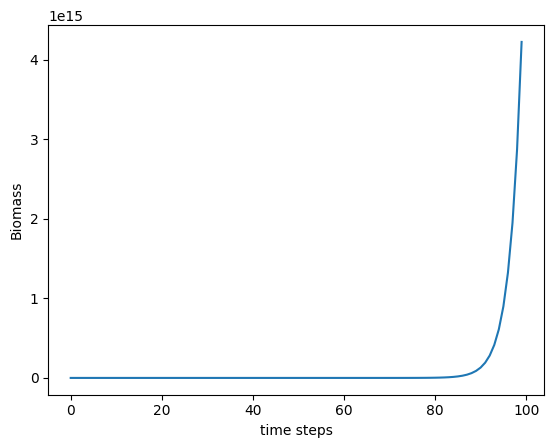

Text(0, 0.5, 'Extracellular Acetate')

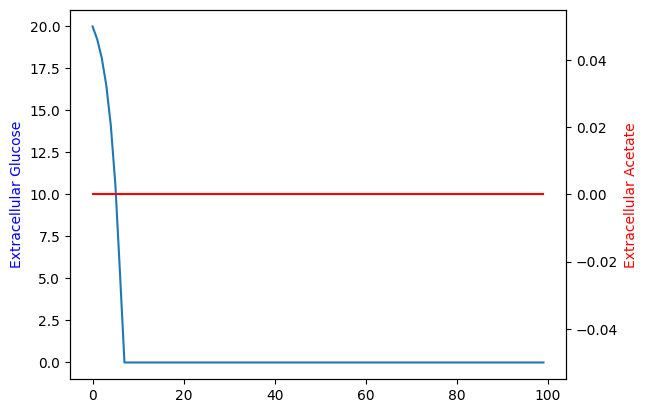

In [ ]:
# plot results
plt.plot(t_vec,(DFBA_biomass))
plt.xlabel('time steps')
plt.ylabel('Biomass')
plt.show()

ax = plt.subplot(111)
ax.plot(t_vec,DFBA_GLC)
ax2 = plt.twinx(ax)
ax2.plot(t_vec,DFBA_ACE, color='r')

ax.set_ylabel('Extracellular Glucose', color='b')
ax2.set_ylabel('Extracellular Acetate', color='r')